# Creating Your First Agent Society

You can also check this cookbook in colab [here](https://colab.research.google.com/drive/1u3ciNuAhZkX-nnkdyZ_eKquDhhhYDTsU?usp=sharing)

## Philosophical Bits



> *What magical trick makes us intelligent? The trick is that there is no trick. The power of intelligence stems from our vast diversity, not from any single, perfect principle.*
>
> -- Marvin Minsky, The Society of Mind, p. 308

In this section, we will take a spite of the task-oriented `RolyPlaying()` class. We design this in an instruction-following manner. The essence is that to solve a complex task, you can enable two communicative agents collabratively working together step by step to reach solutions. The main concepts include:

- **Task**: a task can be as simple as an idea, initialized by an inception prompt.

- **AI User**: the agent who is expected to provide instructions.

- **AI Assistant**: the agent who is expected to respond with solutions that fulfills the instructions.

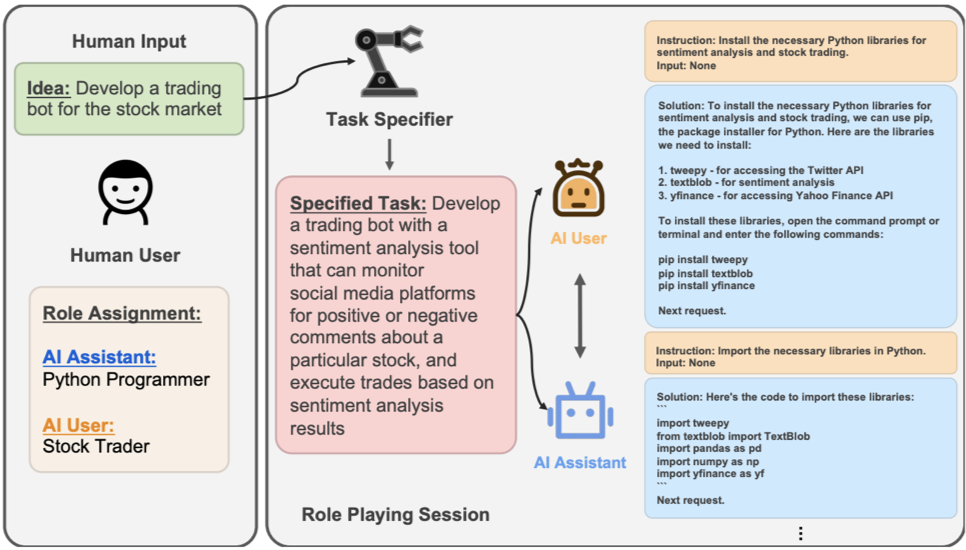

## Quick Start
Let's first play with a `ChatAgent` instance by simply initialize it with a system message and interact with user messages.

### 🕹 Step 0: Prepartions

In [21]:
!pip install "camel-ai==0.2.73"

### Setting Up API Keys

You'll need to set up your API keys for OpenAI.

In [22]:
import os
from getpass import getpass

# Prompt for the API key securely
qwen_api_key = getpass('Enter your API key: ')
os.environ["QWEN_API_KEY"] = qwen_api_key

Enter your API key: ··········


In [23]:
# Import necessary classes
from camel.societies import RolePlaying
from camel.types import ModelType, ModelPlatformType
from camel.configs import QwenConfig
from camel.models import ModelFactory

model = ModelFactory.create(
    model_platform=ModelPlatformType.QWEN,
    model_type=ModelType.QWEN_TURBO,
    model_config_dict=QwenConfig().as_dict(),
)

### 🕹 Step 1: Configure the Role-Playing Session


#### Set the `Task` Arguments

In [24]:
task_kwargs = {
    'task_prompt': 'Develop a plan to TRAVEL to Saudi Arabia, let me know the top three must-visit historical sites and the best local food, no more additioanl actions needed',
    'with_task_specify': False,
    'task_specify_agent_kwargs': {'model': model}
}

#### Set the `User` Arguments
You may think the user as the `instruction sender`.

In [25]:
user_role_kwargs = {
    'user_role_name': 'Curious Explorer',
    'user_agent_kwargs': {'model': model}
}

#### Set the `Assistant` Arguments
Again, you may think the assistant as the `instruction executor`.

In [26]:
assistant_role_kwargs = {
    'assistant_role_name': 'Saudi Arabia Travel Expert',
    'assistant_agent_kwargs': {'model': model}
}

### Step 2: Kickstart Your Society
Putting them altogether – your role-playing session is ready to go!

In [27]:
society = RolePlaying(
    **task_kwargs,             # The task arguments
    **user_role_kwargs,        # The instruction sender's arguments
    **assistant_role_kwargs,   # The instruction receiver's arguments
)

### Step 3: Solving Tasks with Your Society
Hold your bytes. Prior to our travel, let's define a small helper function.

In [28]:
def is_terminated(response):
    """
    Give alerts when the session should be terminated.
    """
    if response.terminated:
        role = response.msg.role_type.name
        reason = response.info['termination_reasons']
        print(f'AI {role} terminated due to {reason}')

    return response.terminated

Time to chart our course – writing a simple loop for our society to proceed:

In [29]:
from camel.utils import print_text_animated
from colorama import Fore


def run(society, round_limit: int=5):

    # Get the initial message from the ai assistant to the ai user
    input_msg = society.init_chat()

    # Starting the interactive session
    for _ in range(round_limit):

        # Get the both responses for this round
        assistant_response, user_response = society.step(input_msg)

        # Check the termination condition
        if is_terminated(assistant_response) or is_terminated(user_response):
            break

        # Get the results
        print_text_animated(
            Fore.BLUE + f'[AI User] {user_response.msg.content}.\n \n')
        # Check if the task is end
        if 'CAMEL_TASK_DONE' in user_response.msg.content:
            break
        print_text_animated(
            Fore.GREEN + f'[AI Assistant] {assistant_response.msg.content}.\n \n')


        # Get the input message for the next round
        input_msg = assistant_response.msg

    return None

In [30]:
run(society)

[AI User] Instruction: What are the top three must-visit historical sites in Saudi Arabia?  
Input: None.
 
[AI Assistant] Solution: The top three must-visit historical sites in Saudi Arabia are:

1. **Al-Ula (including the Marib Dam and the ancient city of Dadan):** Al-Ula is a region rich in history, home to the ancient Nabatean city of Mada'in Saleh, which is a UNESCO World Heritage Site. It also includes the remains of the Marib Dam, one of the oldest dams in the world, built by the Sabaeans around 2000 BCE. The area was a key center of trade and culture in the ancient Arabian Peninsula. The nearby city of Dadan, known as the "City of the Kings," features well-preserved rock-cut tombs and inscriptions that date back over 2,500 years.

2. **Jeddah’s Old Town (Al-Balad):** Located on the Red Sea coast, Jeddah's Old Town is a historic district that showcases traditional Najdi architecture. It was once a major trading hub for spices, incense, and other goods. The area is home to severa